# Credit Card Fraud Managment System Using Machine Learning and Deep Learning techniques

## Importing all the libraries

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,classification_report
LABELS = ["Normal", "Fraud"]
print('check')

check


In [2]:
data = pd.read_csv('C:/Users/Devanshi/Desktop/BE project/creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


## Spiltting the dataset 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state = 0)

## Feature Selection

In [5]:
from sklearn.feature_selection import SelectKBest, f_classif
'''
#Method 1
sel_f = SelectKBest(f_classif, k=10)
X_train_f = sel_f.fit(X_train, y_train)
print(sel_f.get_support())
'''
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

   Specs         Score
17   V17  25474.056179
14   V14  20728.414597
12   V12  14860.008312
10   V10  10200.091855
3     V3   8593.601444
7     V7   8448.985654
16   V16   8375.909431
11   V11   5020.086298
4     V4   3827.794217
18   V18   2728.321421
1     V1   2459.783546
5     V5   2234.754348
9     V9   2011.058289
2     V2   1895.304166
21   V21    482.896219
6     V6    399.364056
19   V19    254.965195
8     V8     80.033876
20   V20     79.181341
0   Time     35.169579


In [6]:
#columns=['V3','V4','V7','V10','V11','V12','V14','V16','V17','V18']
#Keeping the Amount column temporarily to execute the plots
columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V14','V16','V17','V18','V19','V20','V21','Time','Amount']
X_train=X_train[columns]
X_test=X_test[columns]

## Oversampling the training data

In [7]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy=0.25)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)


In [8]:
print('Original training dataset shape',X_train.shape,y_train.shape)
print('Oversampled training dataset shape',X_train_res.shape,y_train_res.shape)
print('Test dataset shape',X_test.shape,y_test.shape)

Original training dataset shape (213605, 21) (213605,)
Oversampled training dataset shape (266541, 21) (266541,)
Test dataset shape (71202, 21) (71202,)


In [9]:
print('original y_train value_counts \n',y_train.value_counts())
print('\noversampled y_train value_count \n',y_train_res.value_counts())
print('\ny_test value_counts \n',y_test.value_counts())

original y_train value_counts 
 0    213233
1       372
Name: Class, dtype: int64

oversampled y_train value_count 
 0    213233
1     53308
Name: Class, dtype: int64

y_test value_counts 
 0    71082
1      120
Name: Class, dtype: int64


In [10]:
data1=X_train_res.copy()
data1[target]=y_train_res

In [11]:
data1.shape

(266541, 22)

In [12]:
precision=[]
recall=[]
f1=[]
accuracy=[]

In [13]:
original_fraud=len(data[data['Class']==1])
original_normal=len(data[data['Class']==0])
df=pd.DataFrame(y_test)
test_fraud=len(df[df['Class']==1])
test_normal=len(df[df['Class']==0])

fraud = data1[data1['Class']==1]
normal = data1[data1['Class']==0]
outlier_fraction = len(fraud)/float((len(fraud)+len(normal)))

In [14]:
print('Original dataset Fraudulent %d and Normal %d'% (original_fraud,original_normal))
print('Oversampled training dataset Fraudulent %d and Normal %d'% (len(fraud),len(normal)))
print('Test dataset Fraudulent %d and Normal %d'%(test_fraud,test_normal))

Original dataset Fraudulent 492 and Normal 284315
Oversampled training dataset Fraudulent 53308 and Normal 213233
Test dataset Fraudulent 120 and Normal 71082


In [15]:
print('Percentage of fraudulent transactions in total original dataset {:.3f} %'.format((original_fraud/(original_fraud+original_normal))*100))
print('Percentage of fraudulent transactions in oversampled dataset + y_test {:.3f} %'.format(((len(fraud)+test_fraud)/(len(fraud)+len(normal)+test_fraud+test_normal))*100))


Percentage of fraudulent transactions in total original dataset 0.173 %
Percentage of fraudulent transactions in oversampled dataset + y_test 15.819 %


## Plots

<IPython.core.display.Javascript object>


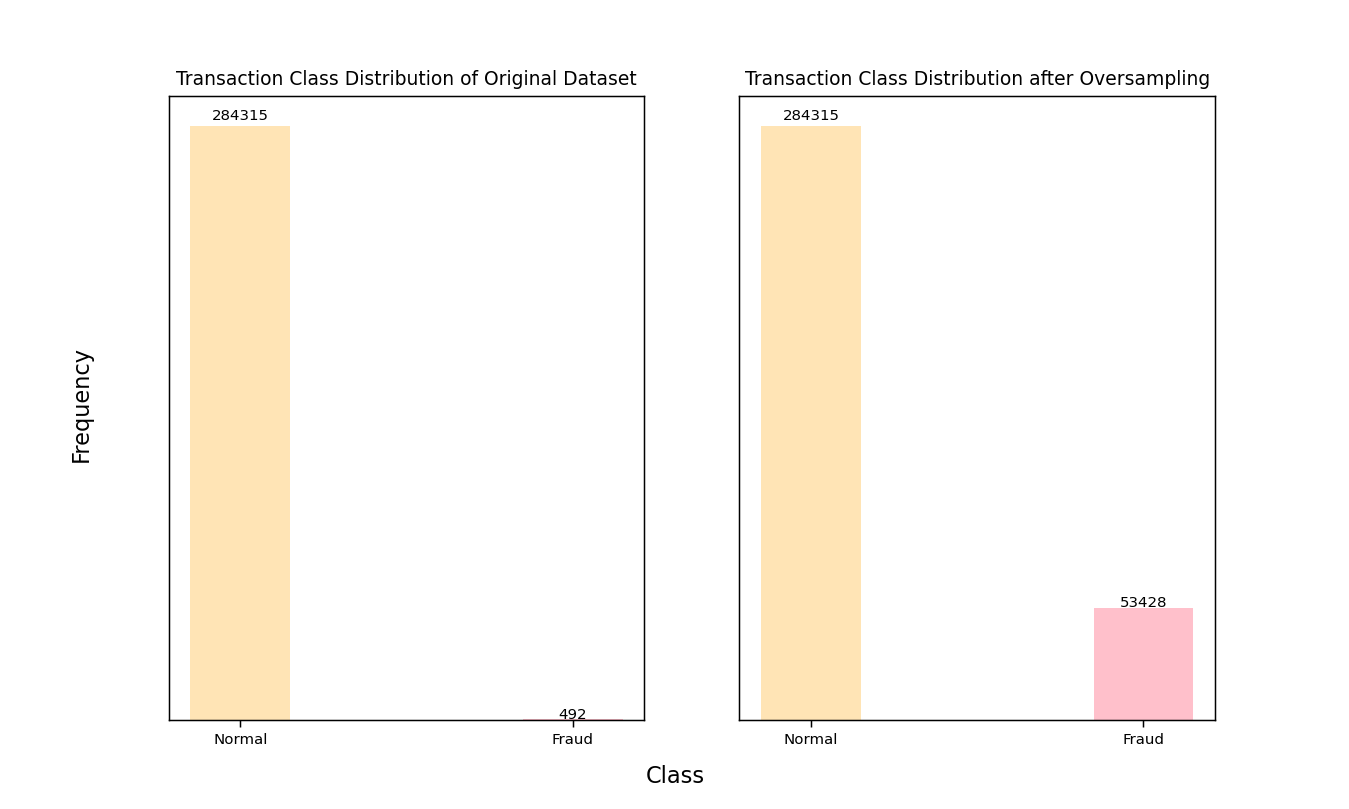

Text(0.06, 0.5, 'Frequency')

In [16]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
plt.subplots_adjust(wspace=0.2)

count_classes = [original_normal,original_fraud]
ax[0].set_xticks(range(2))
ax[0].bar(range(2),count_classes,color=['moccasin','pink'],width=0.3)
ax[0].set_xticklabels(LABELS,fontsize=8)
ax[0].set_yticks([])
ax[0].set_title("Transaction Class Distribution of Original Dataset",fontsize=10)
for i,v in enumerate(count_classes):
    ax[0].text(i,v*1.01,str(v),color='black',fontsize=8, ha='center')

    
count_classes=[len(normal)+test_normal, len(fraud)+test_fraud]
ax[1].bar(range(2),count_classes,color=['moccasin','pink'],width=0.3)
ax[1].set_xticks(range(2))
ax[1].set_xticklabels(LABELS,fontsize=8)
ax[1].set_yticks([])
ax[1].set_title("Transaction Class Distribution after Oversampling",fontsize=10)
for i,v in enumerate(count_classes):
    ax[1].text(i,v*1.01,str(v),color='black',fontsize=8, ha='center')
    
    

# Set common labels
fig.text(0.5, 0.04, 'Class', ha='center', va='center',fontsize=12)
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical',fontsize=12)








<IPython.core.display.Javascript object>


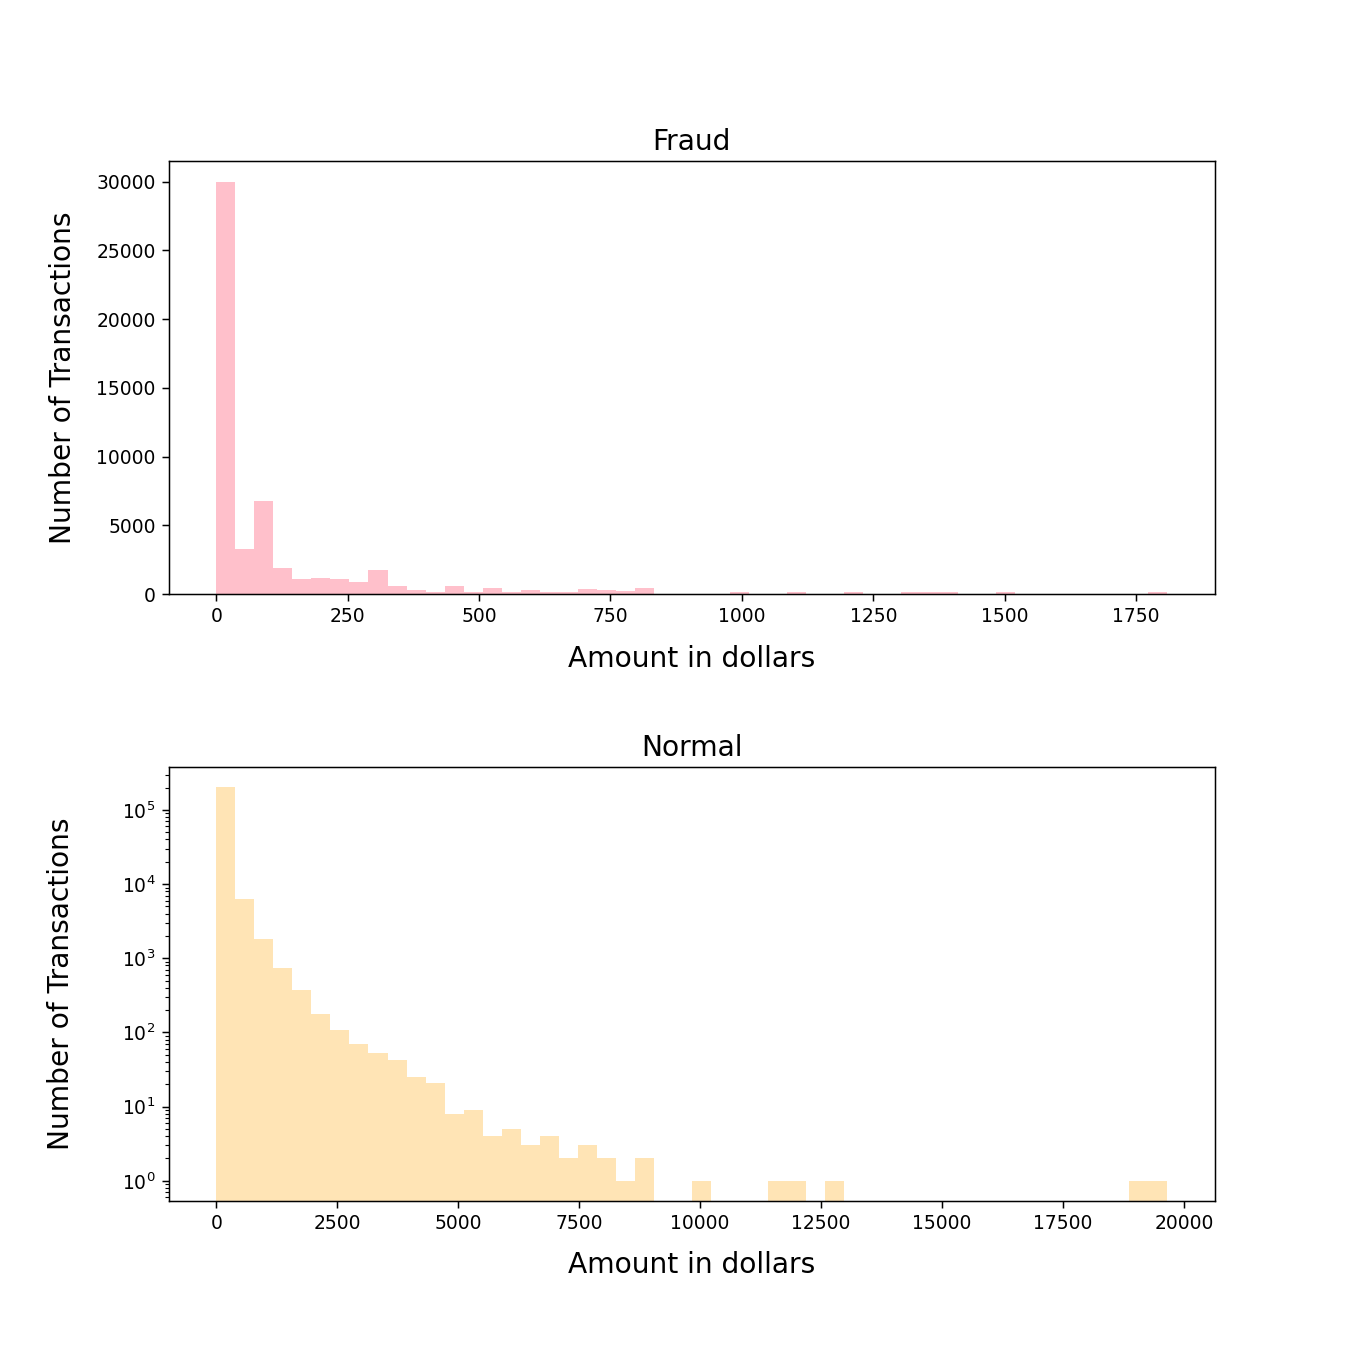

In [17]:
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
fig, ax = plt.subplots(2,1, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)
bins=50
ax[0].hist(fraud.Amount, bins = bins,color='pink')
ax[0].set_xlabel("Amount in dollars",fontsize=15,labelpad=10)
ax[0].set_ylabel("Number of Transactions",fontsize=15,labelpad=10)
ax[0].set_title("Fraud", size=15)
ax[0].set_yticks(np.arange(0,35000,5000))
ax[1].hist(normal.Amount,bins=bins,color='moccasin')
ax[1].set_xlabel("Amount in dollars",fontsize=15,labelpad=10)
ax[1].set_ylabel("Number of Transactions",fontsize=15,labelpad=25)
ax[1].set_title("Normal", size=15)
ax[1].set_yscale('log')


<IPython.core.display.Javascript object>


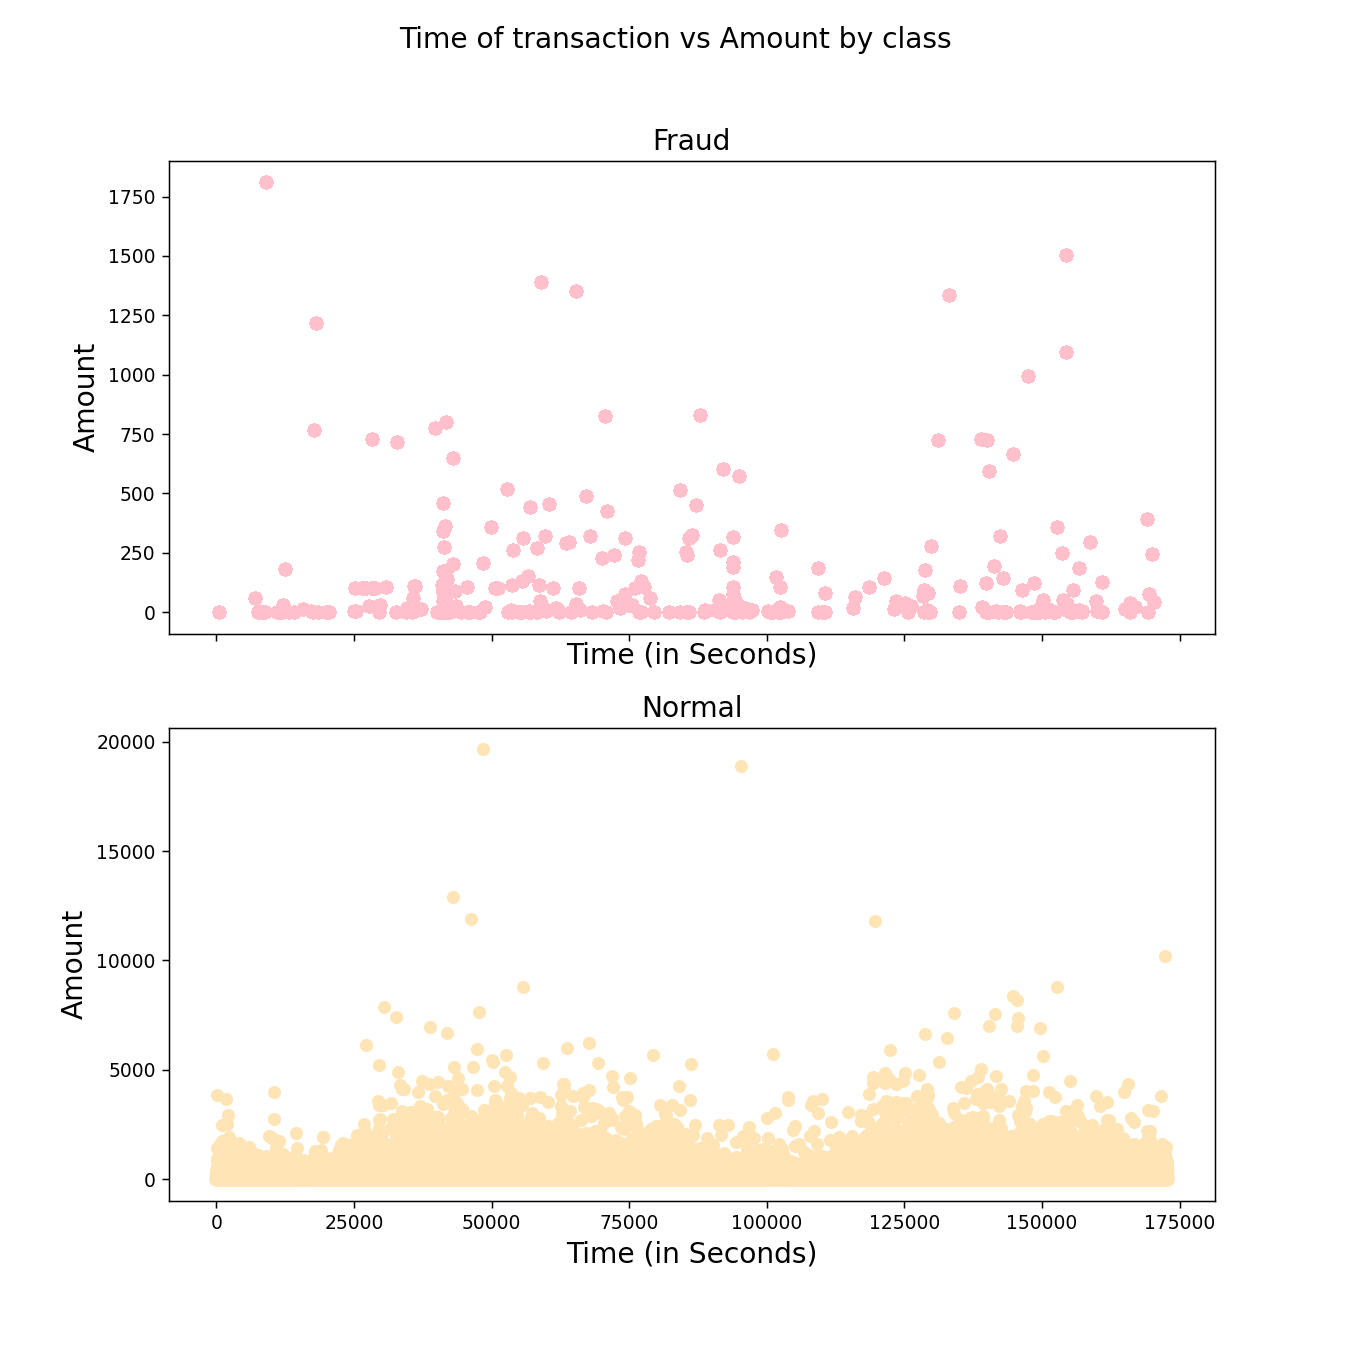

Text(0, 0.5, 'Amount')

In [18]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(10,10))
f.suptitle('Time of transaction vs Amount by class',fontsize=15)
ax1.scatter(fraud.Time, fraud.Amount,c='pink')
ax1.set_title('Fraud',fontsize=15)
ax1.set_xlabel('Time (in Seconds)',fontsize=15)
ax1.set_ylabel('Amount',fontsize=15)
ax2.scatter(normal.Time, normal.Amount,c='moccasin')
ax2.set_title('Normal',fontsize=15)
ax2.set_xlabel('Time (in Seconds)',fontsize=15)
ax2.set_ylabel('Amount',fontsize=15)


In [16]:
#Dropping the Amount column from X_train_res and X_test
X_train_res.drop('Amount',axis=1,inplace=True)
X_test.drop('Amount',axis=1,inplace=True)
a=X_train_res.shape
b=X_test.shape
print('Final X training and test data shape with 20 features',a,b,'respectively')


Final X training and test data shape with 20 features (266541, 20) (71202, 20) respectively


In [17]:
print(y_train_res.shape)
print(y_test.shape)

(266541,)
(71202,)


## Confusion Matrix plot

In [18]:
def conf_matrix_percent(c,l):
    plt.figure(figsize=(5,5))
    sns.heatmap(c/np.sum(c), annot=True, fmt='.3%', cmap='Blues',xticklabels=LABELS, yticklabels=LABELS,annot_kws={"size": 12})
    #Confusion Matrix Visual
    plt.title("{} Confusion Matrix".format(l))
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

## Support Vector Machine

In [22]:
svm= LinearSVC(C=5, random_state=67, dual=False)
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_test)
print("Support Vector Machine Algorithm")
print("Accuracy Score :")
a1=accuracy_score(y_test,y_pred)
print(a1)
print("Classification Report :")
print(classification_report(y_test,y_pred))
c1=classification_report(y_test,y_pred, output_dict=True)

print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
c=confusion_matrix(y_test,y_pred)
tn,fp,fn,tp=c.ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)

precision.append(round(c1['macro avg']['precision'],2))
recall.append(round(c1['macro avg']['recall'],2))
f1.append(round(c1['macro avg']['f1-score'],2))
accuracy.append(a1)


Support Vector Machine Algorithm
Accuracy Score :
0.9959270806999804
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.27      0.82      0.41       120

    accuracy                           1.00     71202
   macro avg       0.63      0.91      0.70     71202
weighted avg       1.00      1.00      1.00     71202

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives
Confusion Matrix
tn = 70813 fp = 269
fn = 21 tp = 99


<IPython.core.display.Javascript object>


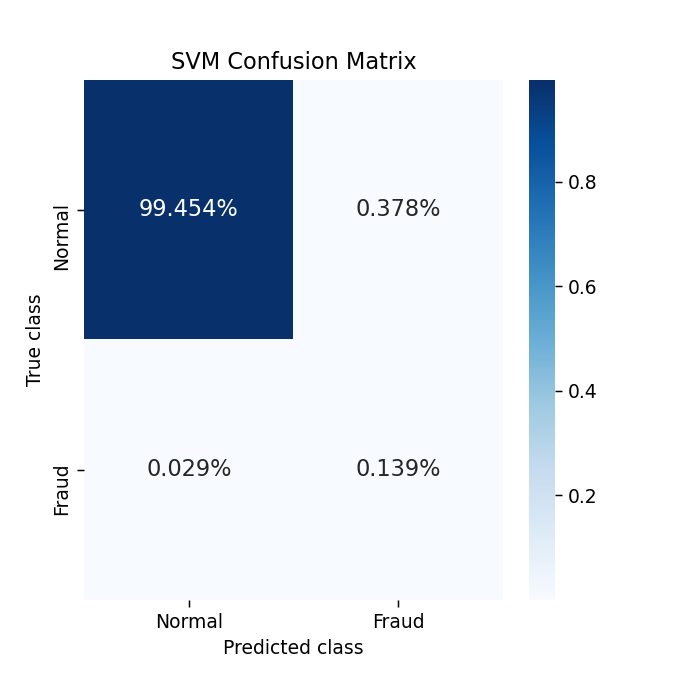

In [23]:
conf_matrix_percent(c,"SVM")

## Isolation Forest Algorithm

Isolation Forest Algorithm
Accuracy Score :
0.9529928934580489
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71082
           1       0.03      0.83      0.06       120

    accuracy                           0.95     71202
   macro avg       0.51      0.89      0.52     71202
weighted avg       1.00      0.95      0.97     71202

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives
Confusion Matrix
tn = 67755 fp = 3327
fn = 20 tp = 100


<IPython.core.display.Javascript object>


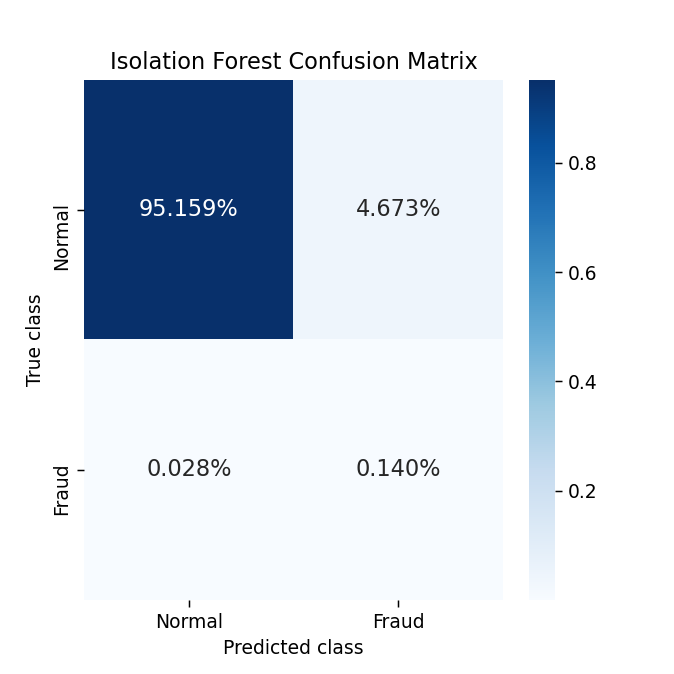

In [24]:
clf=IsolationForest(max_samples=len(X_train_res), contamination=outlier_fraction, random_state=state)
clf.fit(X_train_res)
y_pred = clf.predict(X_test)
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
# Run Classification Metrics
print("Isolation Forest Algorithm")
print("Accuracy Score :")
a2= accuracy_score(y_test,y_pred)
print(a2)
print("Classification Report :")
print(classification_report(y_test,y_pred))
c2=classification_report(y_test,y_pred, output_dict=True)

print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
c=confusion_matrix(y_test,y_pred)
tn,fp,fn,tp=c.ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)

precision.append(round(c2['macro avg']['precision'],2))
recall.append(round(c2['macro avg']['recall'],2))
f1.append(round(c2['macro avg']['f1-score'],2))
accuracy.append(a2)
conf_matrix_percent(c,"Isolation Forest")


## Local Outlier Factor Algorithm

Local Outlier Factor Algorithm
Accuracy Score :
0.9613774893963652
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71082
           1       0.03      0.74      0.06       120

    accuracy                           0.96     71202
   macro avg       0.52      0.85      0.52     71202
weighted avg       1.00      0.96      0.98     71202

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives
Confusion Matrix
tn = 68363 fp = 2719
fn = 31 tp = 89


<IPython.core.display.Javascript object>


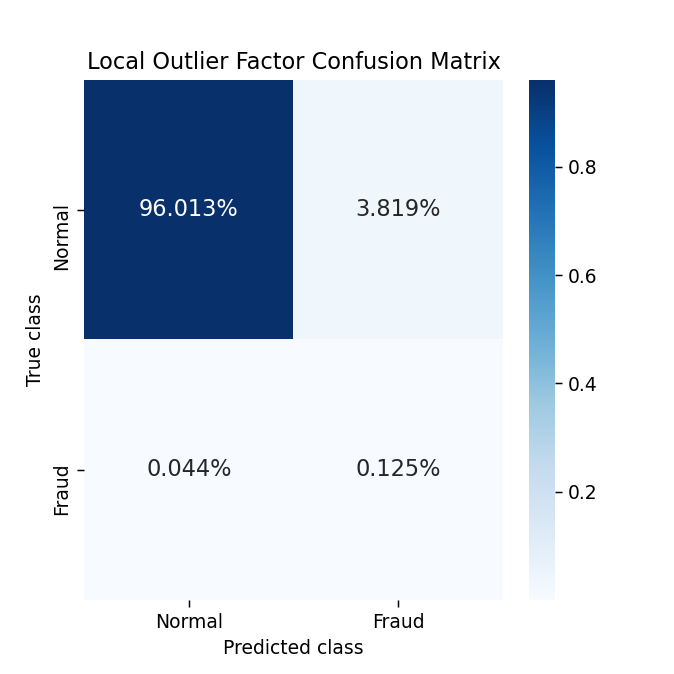

In [25]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.03, novelty=True)
clf.fit(X_train_res)
y_pred=clf.predict(X_test) 
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
# Run Classification Metrics
print("Local Outlier Factor Algorithm")
print("Accuracy Score :")
a3= accuracy_score(y_test,y_pred)
print(a3)
print("Classification Report :")
print(classification_report(y_test,y_pred))
c3=classification_report(y_test,y_pred, output_dict=True)

print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
c=confusion_matrix(y_test,y_pred)
tn,fp,fn,tp=c.ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)

precision.append(round(c3['macro avg']['precision'],2))
recall.append(round(c3['macro avg']['recall'],2))
f1.append(round(c3['macro avg']['f1-score'],2))
accuracy.append(a3)
conf_matrix_percent(c,"Local Outlier Factor")

## Neural Networks

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential()
model.add(Dense(12, input_dim=20, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_res.to_numpy(), y_train_res,epochs=90,validation_split=0.2, batch_size=600)

y_predicted = model.predict(X_test.to_numpy()).T[0].astype(int)

Epoch 1/90
356/356 [==============================] - 1s 2ms/step - loss: 2.7215 - accuracy: 0.9947 - val_loss: 9.8948 - val_accuracy: 0.4912
Epoch 2/90
356/356 [==============================] - 0s 1ms/step - loss: 3.0003 - accuracy: 0.9956 - val_loss: 1508.8123 - val_accuracy: 0.0098
Epoch 3/90
356/356 [==============================] - 0s 1ms/step - loss: 8.1958 - accuracy: 0.9958 - val_loss: 3571.6021 - val_accuracy: 0.0098
Epoch 4/90
356/356 [==============================] - 0s 1ms/step - loss: 7.4421 - accuracy: 0.9955 - val_loss: 6516.3560 - val_accuracy: 0.0098
Epoch 5/90
356/356 [==============================] - 0s 1ms/step - loss: 6.1669 - accuracy: 0.9982 - val_loss: 258.4971 - val_accuracy: 0.2220
Epoch 6/90
356/356 [==============================] - 0s 1ms/step - loss: 0.1099 - accuracy: 0.9942 - val_loss: 7.2315 - val_accuracy: 0.7729
Epoch 7/90
356/356 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9962 - val_loss: 4.7290 - val_accuracy: 0.

In [29]:
print("Neural Networks Algorithm")
print("Accuracy Score :")
a4=accuracy_score(y_test,y_predicted)
print(a4)
print("Classification Report :")
print(classification_report(y_test,y_predicted))
c4=classification_report(y_test,y_predicted,output_dict=True)

print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
c=confusion_matrix(y_test,y_predicted)
tn,fp,fn,tp=c.ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)

Neural Networks Algorithm
Accuracy Score :
0.9993820398303418
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.84      0.78      0.81       120

    accuracy                           1.00     71202
   macro avg       0.92      0.89      0.91     71202
weighted avg       1.00      1.00      1.00     71202

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives
Confusion Matrix
tn = 71064 fp = 18
fn = 26 tp = 94


<IPython.core.display.Javascript object>


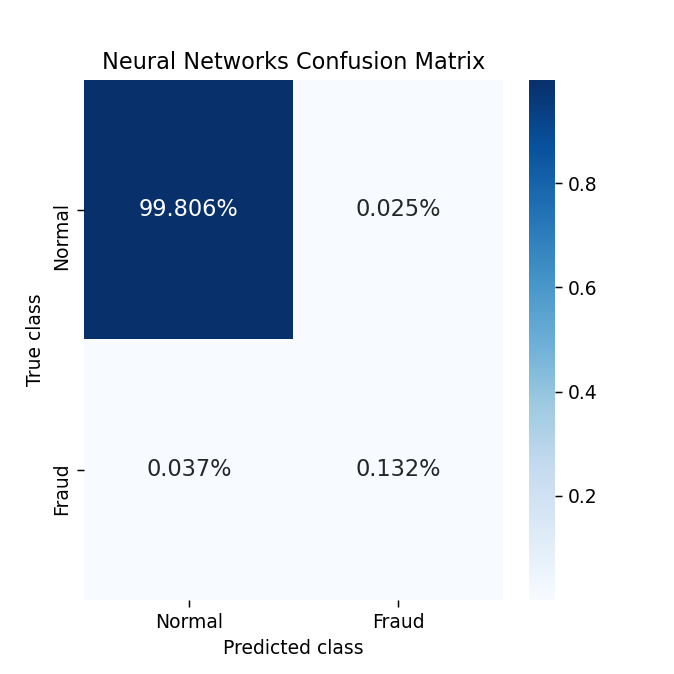

In [30]:
conf_matrix_percent(c,"Neural Networks")

In [31]:
precision.append(round(c4['macro avg']['precision'],2))
recall.append(round(c4['macro avg']['recall'],2))
f1.append(round(c4['macro avg']['f1-score'],2))
accuracy.append(a4)

## K-Means

In [32]:
kmeans=KMeans(n_clusters=2,random_state=0,n_init=20,max_iter=1000)
kmeans.fit(X_train_res)
kmeans_y_pred=kmeans.predict(X_test)
print("K-Means Algorithm")
print("Accuracy Score :")
a5=accuracy_score(y_test,kmeans_y_pred)
print(a5)
print("Classification Report :")
print(classification_report(y_test,kmeans_y_pred))
c5=classification_report(y_test,kmeans_y_pred,output_dict=True)

print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
c=confusion_matrix(y_test,kmeans_y_pred)
tn,fp,fn,tp=c.ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)


K-Means Algorithm
Accuracy Score :
0.5347602595432712
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.54      0.70     71082
           1       0.00      0.34      0.00       120

    accuracy                           0.53     71202
   macro avg       0.50      0.44      0.35     71202
weighted avg       1.00      0.53      0.70     71202

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives
Confusion Matrix
tn = 38035 fp = 33047
fn = 79 tp = 41


<IPython.core.display.Javascript object>


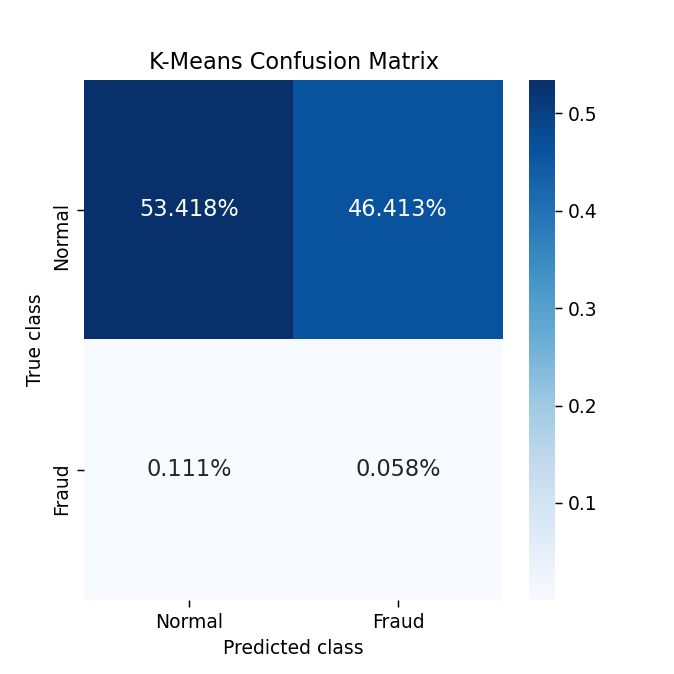

In [33]:
precision.append(round(c5['macro avg']['precision'],2))
recall.append(round(c5['macro avg']['recall'],2))
f1.append(round(c5['macro avg']['f1-score'],2))
accuracy.append(a5)
conf_matrix_percent(c,"K-Means")

## Visualization

<IPython.core.display.Javascript object>


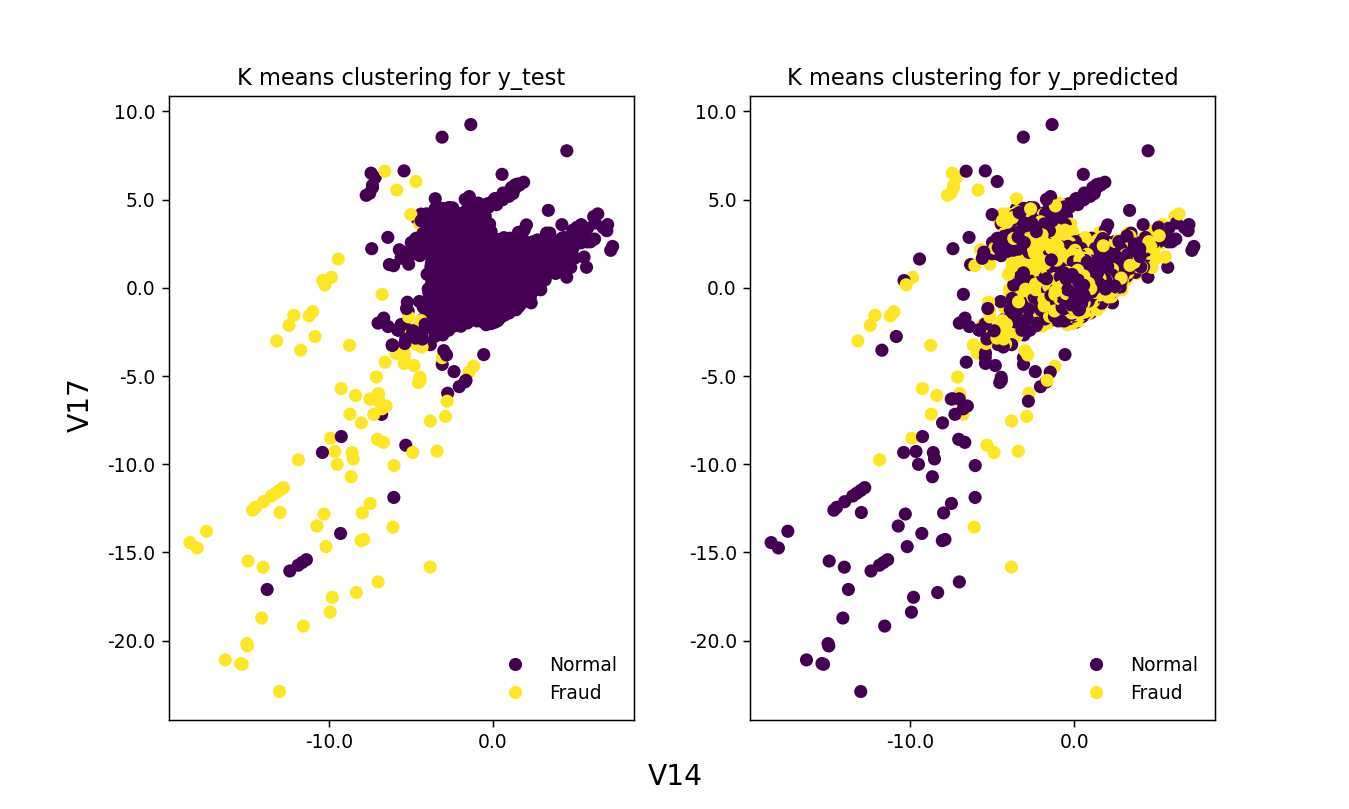

Text(0.06, 0.5, 'V17')

In [34]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
fig, ax = plt.subplots(1,2, figsize=(10,6))
plt.subplots_adjust(wspace=0.25)
s=ax[0].scatter(X_test['V14'],X_test['V17'],c=y_test)
ax[0].set_xticklabels(ax[0].get_xticks(),fontsize=10)
ax[0].set_yticklabels(ax[0].get_yticks(),fontsize=10)
ax[0].set_title("K means clustering for y_test", size=12)
handles, labels = s.legend_elements(prop="colors")
ax[0].legend(handles, ['Normal','Fraud'], loc="lower right",fontsize=10,frameon=False)

w=ax[1].scatter(X_test['V14'],X_test['V17'],c=kmeans_y_pred)
ax[1].set_xticklabels(ax[1].get_xticks(),fontsize=10)
ax[1].set_yticklabels(ax[1].get_yticks(),fontsize=10)
ax[1].set_title("K means clustering for y_predicted", size=12)
handles, labels = w.legend_elements(prop="colors")
ax[1].legend(handles, ['Normal','Fraud'], loc="lower right",fontsize=10,frameon=False)


# Set common labels
fig.text(0.5, 0.04, 'V14', ha='center', va='center',fontsize=15)
fig.text(0.06, 0.5, 'V17', ha='center', va='center', rotation='vertical',fontsize=15)

## K Nearest Neighbors

In [35]:
k=[5,50,100,150,200,250,300,350,400,450,500,550]
train=[]
test=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree",n_jobs=-1)
    knn.fit(X_train_res,y_train_res.ravel())
    knn_predicted_test_labels=knn.predict(X_test)
    train_score = knn.score(X_train_res,y_train_res)
    test_score  = knn.score(X_test, y_test)
    train.append(train_score)
    test.append(test_score)


<IPython.core.display.Javascript object>


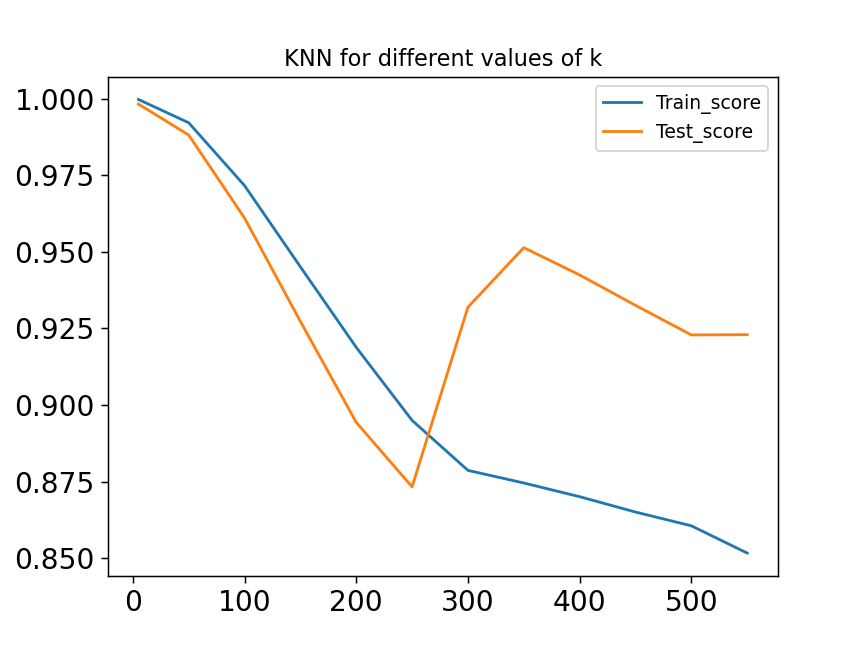

In [36]:
plt.figure()
plt.plot(k,train,label='Train_score')
plt.plot(k,test,label='Test_score')
plt.title('KNN for different values of k')
plt.legend()
df=pd.DataFrame()
df['k']=k
df['train']=train
df['test']=test


In [37]:
print(df)

      k     train      test
0     5  0.999779  0.998273
1    50  0.992166  0.988160
2   100  0.971637  0.961040
3   150  0.945108  0.927277
4   200  0.918815  0.894315
5   250  0.894958  0.873262
6   300  0.878634  0.931940
7   350  0.874518  0.951378
8   400  0.870043  0.942459
9   450  0.865026  0.932544
10  500  0.860536  0.922867
11  550  0.851636  0.922966


<IPython.core.display.Javascript object>


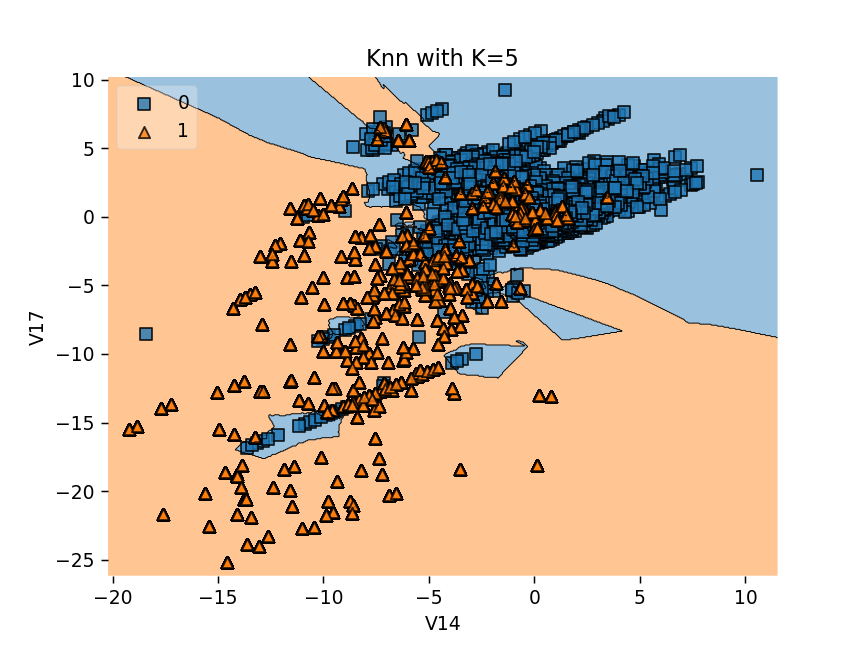

<IPython.core.display.Javascript object>


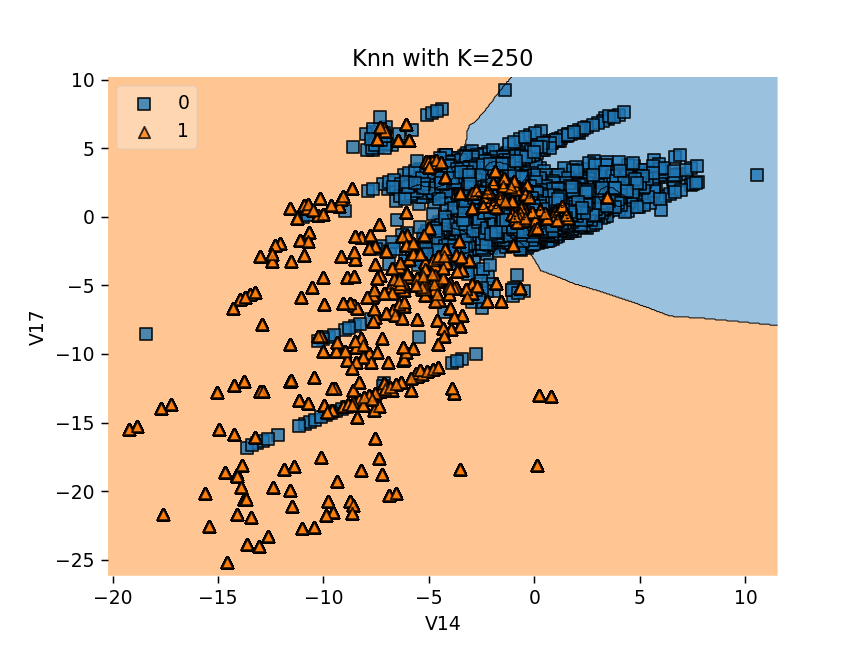

<IPython.core.display.Javascript object>


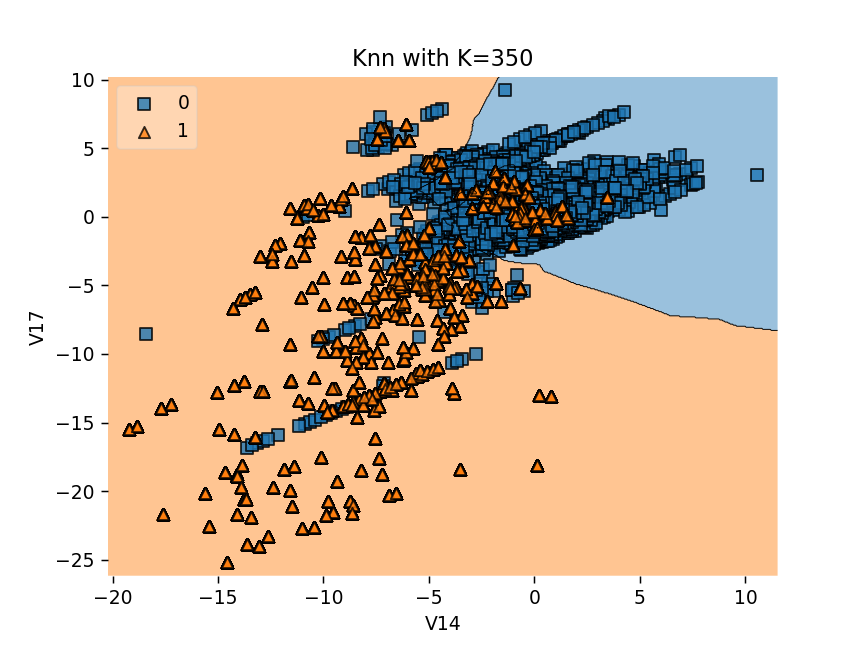

In [19]:
from mlxtend.plotting import plot_decision_regions
x = (X_train_res[['V14','V17']]).to_numpy()
y = y_train_res.to_numpy()
k=[5,250,350]
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree",n_jobs=-1)
    clf.fit(x, y)
    plt.figure()
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('V14')
    plt.ylabel('V17')
    plt.title('Knn with K='+ str(i),)
    plt.show()



In [46]:
knn=KNeighborsClassifier(n_neighbors=350,algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train_res,y_train_res.ravel())
knn_predicted_test_labels=knn.predict(X_test)
#calculating confusion matrix for knn
#scoring knn
print("K-Nearest Neighbors Algorithm")
print("Accuracy Score :")
a6=accuracy_score(y_test,knn_predicted_test_labels)
print(a6)
print("Classification Report :")
print(classification_report(y_test,knn_predicted_test_labels))
c6=classification_report(y_test,knn_predicted_test_labels, output_dict=True)

print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")
c=confusion_matrix(y_test,knn_predicted_test_labels)
tn,fp,fn,tp=c.ravel()
print("Confusion Matrix")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)

K-Nearest Neighbors Algorithm
Accuracy Score :
0.9513777702873515
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71082
           1       0.01      0.28      0.02       120

    accuracy                           0.95     71202
   macro avg       0.50      0.61      0.50     71202
weighted avg       1.00      0.95      0.97     71202

tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives
Confusion Matrix
tn = 67707 fp = 3375
fn = 87 tp = 33


<IPython.core.display.Javascript object>


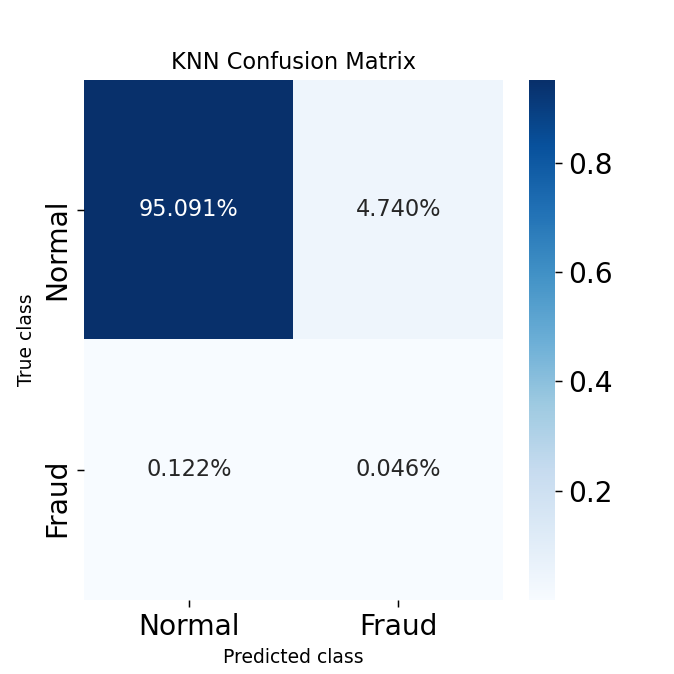

In [47]:
precision.append(round(c6['macro avg']['precision'],2))
recall.append(round(c6['macro avg']['recall'],2))
f1.append(round(c6['macro avg']['f1-score'],2))
accuracy.append(a6)
conf_matrix_percent(c,"KNN")

## Plots

<IPython.core.display.Javascript object>


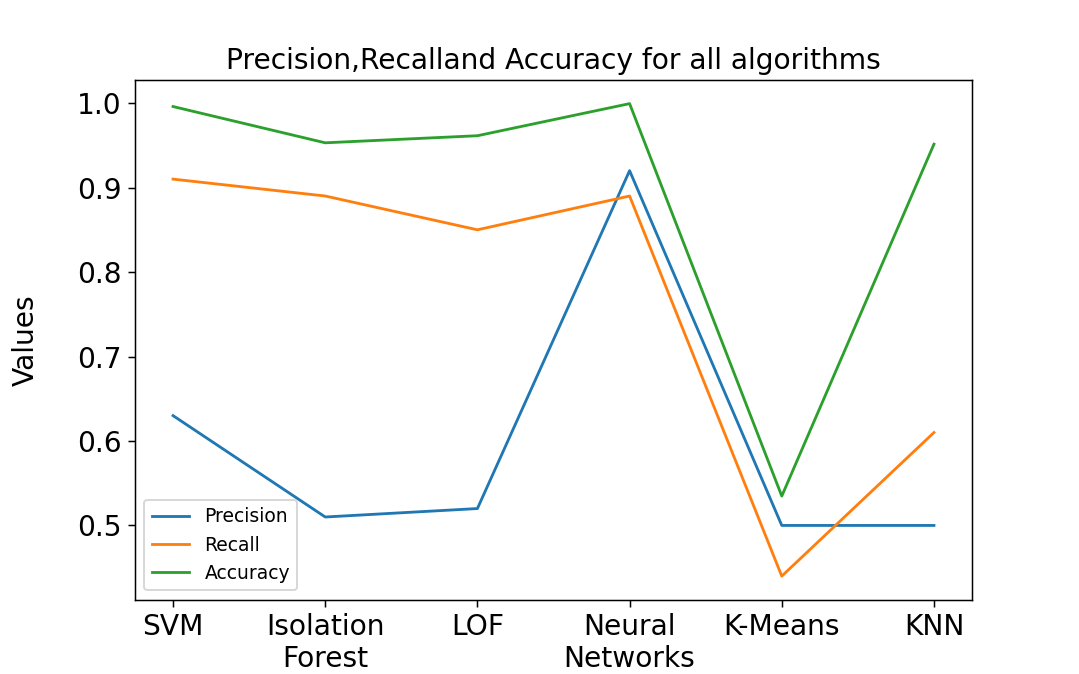

In [48]:
plt.figure(figsize=(8,5))
x=['SVM','Isolation\nForest','LOF','Neural\nNetworks','K-Means','KNN']
plt.plot(x, precision, label = "Precision")
plt.plot(x, recall, label = "Recall")
plt.plot(x, accuracy, label = "Accuracy")
plt.legend(fontsize=10,loc='lower left')
plt.xlabel('Algorithms',fontsize=15,labelpad=20)
plt.ylabel('Values',fontsize=15,labelpad=20)
plt.xticks(fontsize=15)
plt.title('Precision,Recall and Accuracy for all algorithms',fontsize=15)
plt.show()

<IPython.core.display.Javascript object>


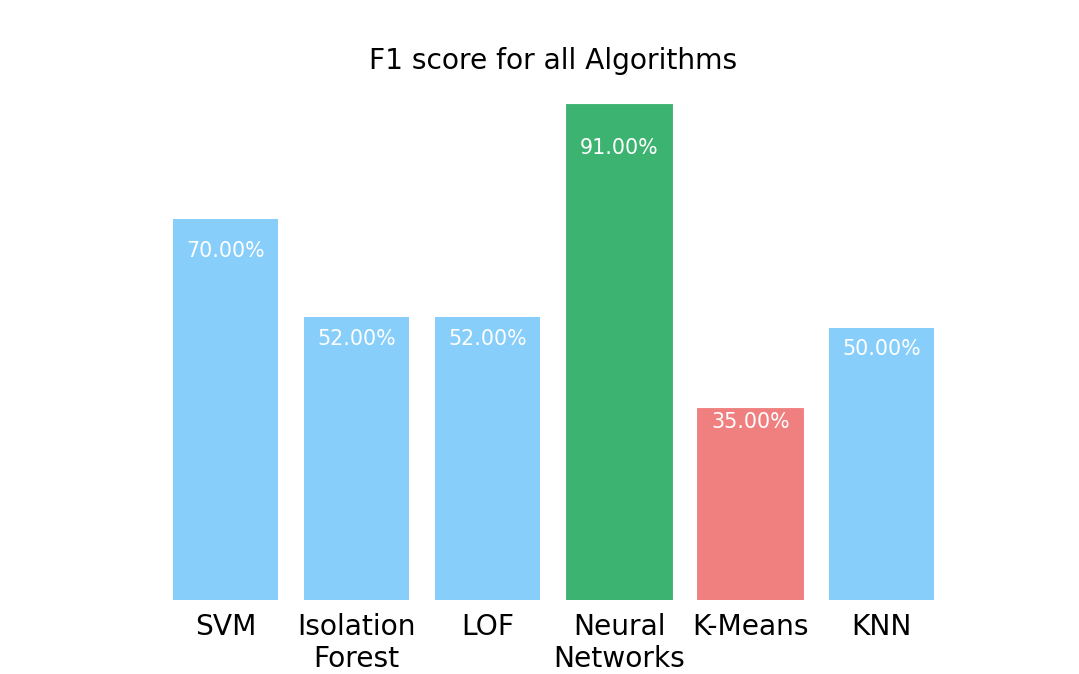

Text(0.5, 1.0, 'F1 score for all Algorithms')

In [49]:
plt.figure(figsize=(8,5))
x=['SVM','Isolation\nForest','LOF','Neural\nNetworks','K-Means','KNN']
bars = plt.bar(range(6), f1,color='lightskyblue')
# directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.2f}'.format(height*100)+'%', ha='center', color='w', fontsize=11)
h=f1.index(max(f1))
l=f1.index(min(f1))
bars[h].set_color('mediumseagreen')
bars[l].set_color('lightcoral')
# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([0,1,2,3,4,5],x,fontsize=15);
plt.title('F1 score for all Algorithms', fontsize=15)



